In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import root_mean_squared_error

In [2]:
# %matplotlib widget


# https://neptune.ai/blog/cross-validation-in-machine-learning-how-to-do-it-right

# 1. Overfit and underfit

In [3]:
def f(x):
    return 1 / (1 + 25 * x ** 2)

In [4]:
x_plot = np.arange(-2, 2, 0.01)
y_plot = f(x_plot)

In [5]:
# равномерная сетка на 50 точек
x_train = np.linspace(-2, 2, 51)
y_train = f(x_train)

In [6]:
x_test = x_train - 0.04
x_test = x_test[1:]
y_test = f(x_test)

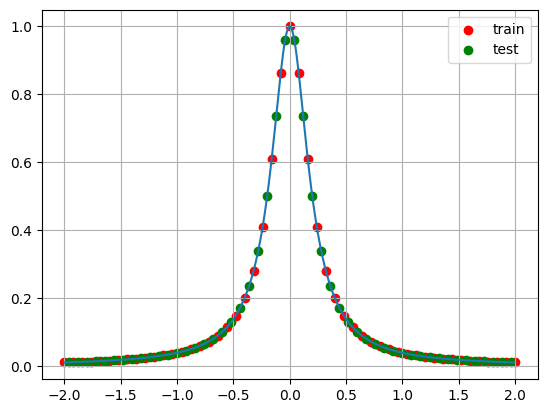

In [7]:
plt.plot(x_plot, y_plot)
plt.scatter(x_train, y_train, c='r', label='train')
plt.scatter(x_test, y_test, c='g', label='test')
plt.grid()
plt.legend();

In [8]:
plt.close()

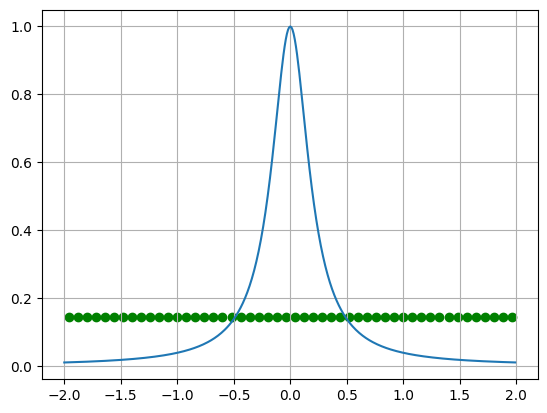

In [9]:
degree = 1
z = np.polyfit(x_train, y_train, degree)
y_pred = np.polyval(z, x_test)

plt.plot(x_plot, y_plot)
plt.scatter(x_test, y_pred, c='g')
plt.grid()

In [10]:
plt.close()

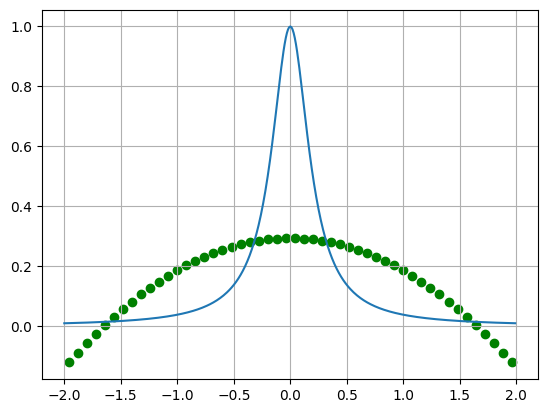

In [11]:
degree = 2
z = np.polyfit(x_train, y_train, degree)
y_pred = np.polyval(z, x_test)

plt.plot(x_plot, y_plot)
plt.scatter(x_test, y_pred, c='g')
plt.grid()

In [12]:
plt.close()

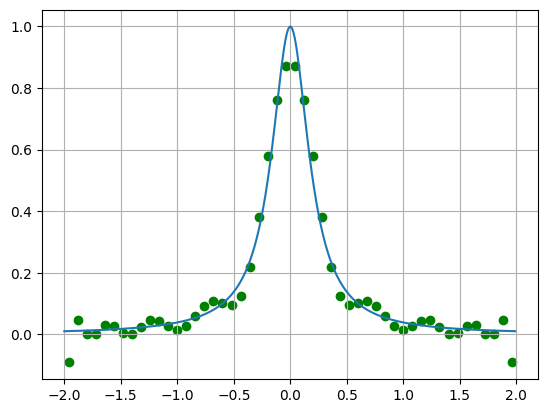

In [13]:
degree = 20
z = np.polyfit(x_train, y_train, degree)
y_pred = np.polyval(z, x_test)

plt.plot(x_plot, y_plot)
plt.scatter(x_test, y_pred, c='g')
plt.grid()

In [14]:
plt.close()

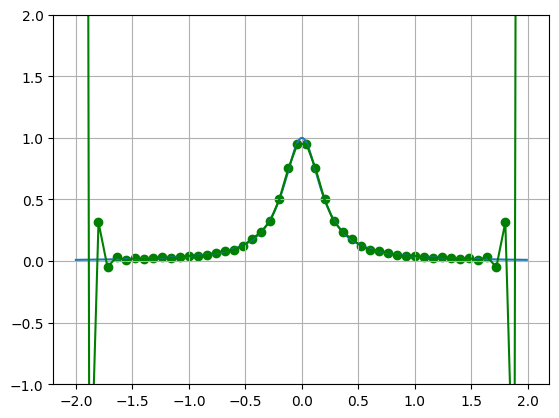

In [15]:
degree = 35
z = np.polyfit(x_train, y_train, degree)
y_pred = np.polyval(z, x_test)

plt.plot(x_plot, y_plot)
plt.plot(x_test, y_pred, c='g')
plt.scatter(x_test, y_pred, c='g')
plt.ylim([-1, 2])
plt.grid()

In [16]:
plt.close()

In [17]:
max_degree = 31

In [18]:
rmse_train = []
for degree in range(1, max_degree):
    z = np.polyfit(x_train, y_train, degree)
    y_pred = np.polyval(z, x_train)
    e = root_mean_squared_error(y_train, y_pred)
    rmse_train.append(e)

In [19]:
rmse_test = []
for degree in range(1, max_degree):
    z = np.polyfit(x_train, y_train, degree)
    y_pred = np.polyval(z, x_test)
    e = root_mean_squared_error(y_test, y_pred)
    rmse_test.append(e)

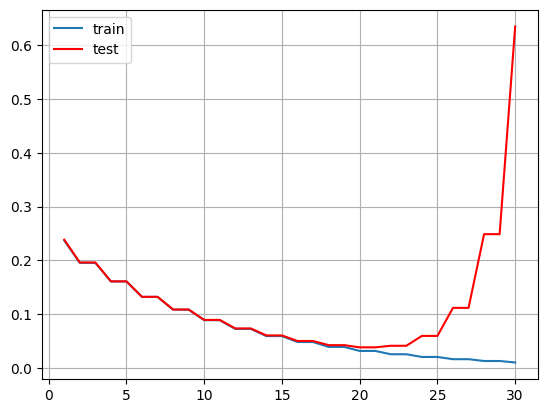

In [20]:
plt.plot(np.arange(1, max_degree), rmse_train, label='train')
plt.plot(np.arange(1, max_degree), rmse_test, c='r', label='test')
plt.grid()
plt.legend();

In [21]:
plt.close()

## LinearRegression

In [22]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [23]:
def get_X(x, max_degree):
    X = [x]
    for degree in range(2, max_degree + 1):
        X.append(x ** degree)
    X = np.vstack(X).T
    return X

In [24]:
max_degree = 20
X = get_X(x_train, max_degree)
X_test = get_X(x_test, max_degree)
X.shape

(51, 20)

In [25]:
reg = LinearRegression().fit(X, y_train)
reg.score(X, y_train)

0.9823966249302074

In [26]:
y_pred = reg.predict(X_test)
root_mean_squared_error(y_test, y_pred)

0.03810725392963325

ridge

In [27]:
ridge = Ridge(alpha=1).fit(X, y_train)
ridge.score(X, y_train)

0.6294580110681707

In [28]:
y_pred = ridge.predict(X_test)
root_mean_squared_error(y_test, y_pred)

0.1458073978749912

lasso

In [29]:
lasso = Lasso(alpha=1).fit(X, y_train)
lasso.score(X, y_train)

/home/work/.local/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.019e+00, tolerance: 2.862e-04
  model = cd_fast.enet_coordinate_descent(


0.10306024717022

In [30]:
y_pred = lasso.predict(X_test)
root_mean_squared_error(y_test, y_pred)

0.2265014141994696

## Как себя ведут KNN, DecisionTreeRegressor, RandomForestRegressor?

# Bias-variance

https://education.yandex.ru/handbook/ml/article/bias-variance-decomposition

In [31]:
def foo(x):
    return x * np.sin(x)

In [32]:
def add_noise(x, std):
    noise = np.random.normal(0, std, size=x.shape)
    x_noisy = x + noise
    return x_noisy 

In [33]:
noise_std = 3

In [34]:
x_plot = np.arange(-10, 10, 0.01)
y_plot = foo(x_plot)

In [35]:
train_size = 30

x_train = np.random.uniform(low=-10, high=10, size=train_size)
y_train = foo(x_train)
y_train = add_noise(y_train, noise_std)

In [36]:
test_size = 30

x_test = np.random.uniform(low=-10, high=10, size=test_size)
y_test = foo(x_test)
y_test = add_noise(y_test, noise_std)

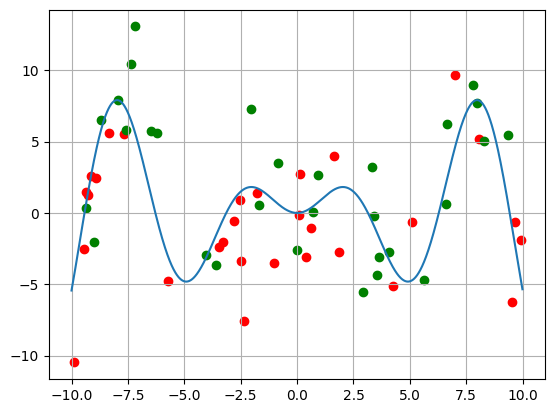

In [37]:
plt.plot(x_plot, y_plot)
plt.scatter(x_train, y_train, c='r')
plt.scatter(x_test, y_test, c='g')
plt.grid()

In [38]:
from sklearn.tree import DecisionTreeRegressor

In [39]:
max_depth = 10
reg = DecisionTreeRegressor(max_depth=max_depth)

In [40]:
reg.fit(x_train.reshape(-1, 1), y_train)

DecisionTreeRegressor(max_depth=10)

In [41]:
y_pred = reg.predict(x_test.reshape(-1, 1))

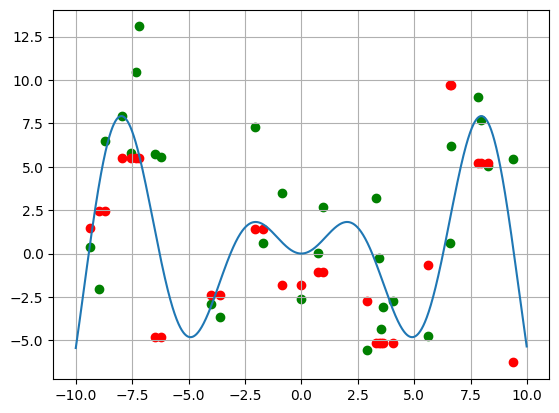

In [42]:
plt.plot(x_plot, y_plot)
plt.scatter(x_test, y_test, c='g')
plt.scatter(x_test, y_pred, c='r')
plt.grid()

Самостоятельно построить график компонент ошибки в зависимости от глубины дерева:
https://education.yandex.ru/handbook/ml/article/bias-variance-decomposition

# Различия в обучающей и тестовой выборках

In [43]:
def f(x, mean, std):
    return 2 * x + np.random.normal(mean, std, size=x.shape)

In [44]:
train_size = 50
x_train = np.random.uniform(low=-2, high=2, size=train_size)
y_train = f(x_train, 0, 1)

In [45]:
test_size = 50
x_test = np.random.uniform(low=-2, high=2, size=test_size)
y_test = f(x_test, 0.1, 1)

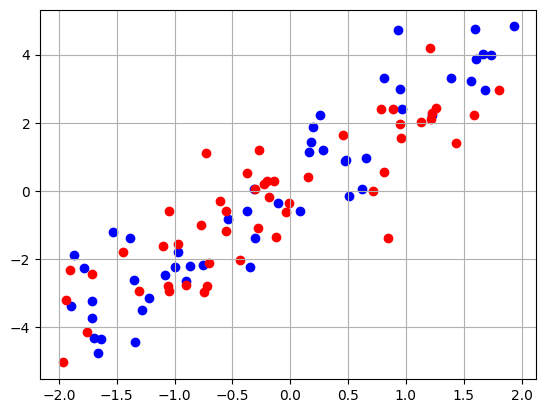

In [46]:
plt.scatter(x_train, y_train, c='b')
plt.scatter(x_test, y_test, c='r')
plt.grid()